In [2]:
# Import modules
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
from scipy.stats import mode
import random
import numpy as np
csvpath = os.path.join("StateAndCategory.xlsx")

In [3]:
state_df = pd.read_excel('StateAndCategory.xlsx', header=1)
state_df = state_df[["State", "Category", "Dollars", "Unit sales", "Volume sales"]]
state_df.columns =["States", "Category", "Dollars", "Unit sales", "Volume sales"]
state_df = state_df.dropna()
state_df

,States,Category,Dollars,Unit sales,Volume sales
0,Alabama,Alcohol,23580628.0,2969760.0,836512.0
1,Alabama,Alcohol,23191408.0,2891303.0,828622.0
2,Alabama,Alcohol,21743590.0,2727065.0,761632.0
3,Alabama,Alcohol,21929512.0,2761075.0,767176.0
4,Alabama,Alcohol,23150890.0,2868207.0,813904.0
...,...,...,...,...,...
75202,Wyoming,Vegetables,2210363.0,988026.0,1591243.0
75203,Wyoming,Vegetables,2181357.0,972493.0,1597701.0
75204,Wyoming,Vegetables,2245436.0,1001169.0,1655808.0
75205,Wyoming,Vegetables,2343309.0,1039786.0,1786256.0


In [4]:
# Find all the States included in the data set and count the number of different states
state_unique = state_df["States"].unique()
state_unique , len(state_unique)

(array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
        'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
        'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
        'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
        'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
        'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
        'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object),
 43)

At first glance it may appear that all 50 states are included in the dataset, however, it looks like 43 are only included. The states included in the dataframe are listed above. 

In [5]:
# Find different categories included in the dataset and count the number of different categories
category_unique = state_df["Category"].unique()
category_unique , len(category_unique)

(array(['Alcohol', 'Beverages', 'Dairy', 'Fats and oils', 'Fruits',
        'Grains', 'Meats, eggs, and nuts', 'Other', 'Sugar and sweeteners',
        'Vegetables'], dtype=object),
 10)

In [6]:
# Read Census data into dataframe, # Drop extraneous rows and columns
pop = pd.read_csv("2019_Census_US_Population_Data_By_State_Lat_long.csv")
pop = pop[["STATE", "POPESTIMATE2019"]]
pop.columns = ["State", "Population"]
pop.dropna()
pop.head()

,State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


In [7]:
# States with highest alcohol consumption based on Unit Sales
alcohol = state_df.loc[state_df["Category"] == "Alcohol"]
alcohol_by_state = alcohol.groupby(alcohol["States"]).sum()["Unit sales"]
alcohol_by_state = alcohol_by_state.sort_values(ascending=False)
display(alcohol_by_state.head())

States
Texas             2.931472e+09
California        2.728076e+09
Florida           2.087829e+09
North Carolina    1.219686e+09
Ohio              1.117535e+09
Name: Unit sales, dtype: float64

In [8]:
# Using the aggregation method to generate Summary Statistics table
summary_stats = state_df.groupby(["States"])[["Volume sales"]]
summary_stats.agg(['mean', 'median', 'var', 'std','sem']).head()

Volume sales                                                      
                    mean      median           var           std           sem
States                                                                        
Alabama     3.981282e+07   9234758.0  7.897530e+15  8.886805e+07  2.228677e+06
Arizona     4.731101e+07  16360459.5  9.392952e+15  9.691724e+07  2.430538e+06
Arkansas    2.130040e+07   6636847.0  1.972210e+15  4.440957e+07  1.113725e+06
California  1.717772e+08  60286206.0  1.227545e+17  3.503633e+08  8.786585e+06
Colorado    3.484989e+07  12552979.0  4.975208e+15  7.053515e+07  1.768915e+06

In [9]:
state_pop = pd.merge(pop,alcohol_by_state,how='right',left_on='State',right_on='States')
state_pop["Per Capita"] = state_pop["Unit sales"] / state_pop["Population"]
state_pop.head()

,State,Population,Unit sales,Per Capita
0,Texas,28995881,2.931472e+09,101.099609
1,California,39512223,2.728076e+09,69.043841
2,Florida,21477737,2.087829e+09,97.208977
3,North Carolina,10488084,1.219686e+09,116.292538
4,Ohio,11689100,1.117535e+09,95.604914


In [10]:
state_pop.describe()

,Population,Unit sales,Per Capita
count,4.300000e+01,4.300000e+01,43.000000
mean,7.253779e+06,5.578639e+08,79.290381
std,7.670596e+06,6.574517e+08,41.139452
min,5.787590e+05,9.721480e+05,0.917674
25%,2.996976e+06,1.555863e+08,46.336219
50%,5.148714e+06,2.955381e+08,94.351180
75%,8.075206e+06,7.554482e+08,112.035538
max,3.951222e+07,2.931472e+09,149.770938


Text(0, 0.5, 'Per Capita Alcohol')

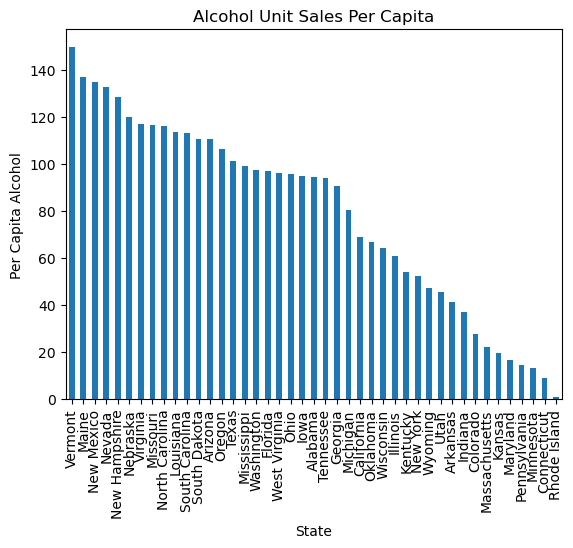

In [23]:
alcohol_by_state = state_pop.groupby(state_pop['State']).sum()['Per Capita']
alcohol_by_state = alcohol_by_state.sort_values(ascending= False)
alcohol_by_state.plot.bar()
plt.title('Alcohol Unit Sales Per Capita')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.ylabel('Per Capita Alcohol')

The above figure illustrates the states with the highest and lowest per capita alcohol sales based on population. Vermont was found to have the largest alcohol per capita sales while Rhode island was found to have the least.

Now that we have analyzed the per capita alcohol sales based on the population of each state, we can look at the median household income per state to see if there is any correlation between the two.

In [12]:
# Data frame that shows the median household income per state
state_income = pd.read_csv("household_median_income_2017.csv")
state_income = state_income[["State", "2017"]]
state_income.columns = ['States', 'Median Household Income']
state_income.dropna()

,States,Median Household Income
0,United States,"61,372"
1,Alabama,"51,113"
2,Alaska,"72,231"
3,Arizona,"61,125"
4,Arkansas,"48,829"
5,California,"69,759"
6,Colorado,"74,172"
7,Connecticut,"72,780"
8,Delaware,"62,318"
9,D.C.,"83,382"


In [13]:
#state_income["Median Household Income"].astype('int')
state_income['Median Household Income']=state_income['Median Household Income'].str.replace(',','')
state_incomes = state_income.dropna()

In [14]:
state_incomes["Median Household Income"].astype('int')
state_incomes.head()

,States,Median Household Income
0,United States,61372
1,Alabama,51113
2,Alaska,72231
3,Arizona,61125
4,Arkansas,48829


In [15]:
alcohol_income = pd.merge(state_incomes, state_pop, how = 'right', left_on='States', right_on='State')
alcohol_income = alcohol_income[["State", "Population", "Unit sales", "Per Capita", "Median Household Income"]]
alcohol_income.head()

,State,Population,Unit sales,Per Capita,Median Household Income
0,Texas,28995881,2.931472e+09,101.099609,59295
1,California,39512223,2.728076e+09,69.043841,69759
2,Florida,21477737,2.087829e+09,97.208977,53681
3,North Carolina,10488084,1.219686e+09,116.292538,50343
4,Ohio,11689100,1.117535e+09,95.604914,59768


In [16]:
alcohol_income['Per Capita'].describe()

count     43.000000
mean      79.290381
std       41.139452
min        0.917674
25%       46.336219
50%       94.351180
75%      112.035538
max      149.770938
Name: Per Capita, dtype: float64

In [17]:
alcohol_income["Median Household Income"] = alcohol_income["Median Household Income"].astype(float)
display(alcohol_income.head())

,State,Population,Unit sales,Per Capita,Median Household Income
0,Texas,28995881,2.931472e+09,101.099609,59295.0
1,California,39512223,2.728076e+09,69.043841,69759.0
2,Florida,21477737,2.087829e+09,97.208977,53681.0
3,North Carolina,10488084,1.219686e+09,116.292538,50343.0
4,Ohio,11689100,1.117535e+09,95.604914,59768.0


In [18]:
print(alcohol_income.dtypes)

State                       object
Population                   int64
Unit sales                 float64
Per Capita                 float64
Median Household Income    float64
dtype: object


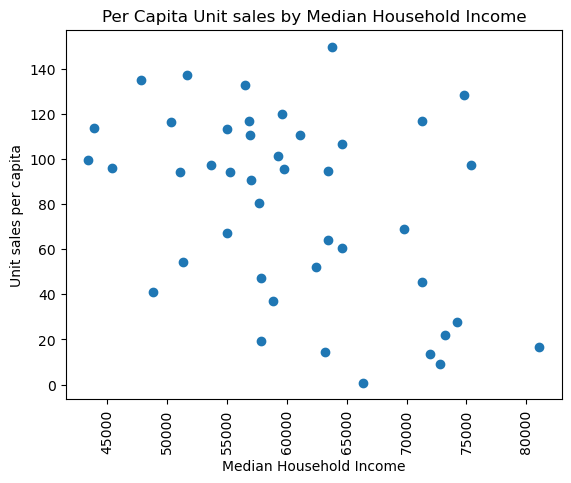

In [19]:
x_values = alcohol_income['Median Household Income']
y_values = alcohol_income['Per Capita']
plt.scatter(x_values,y_values)
plt.title("Per Capita Unit sales by Median Household Income")
plt.xlabel('Median Household Income')
plt.xticks(rotation = 90)
plt.ylabel('Unit sales per capita')
plt.show()

The r-squared is: 0.1726696504753701


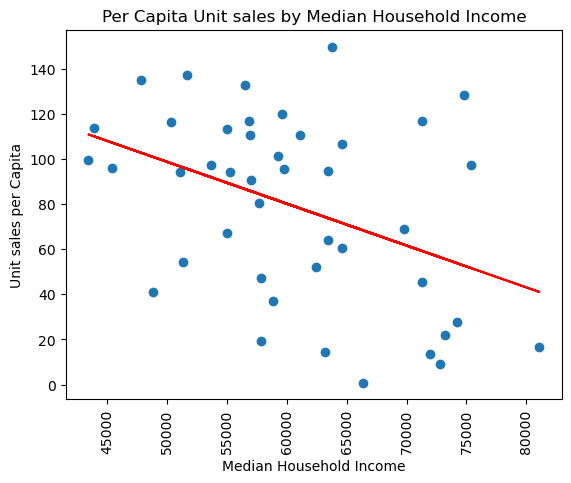

In [20]:
# Linear regression to show correlation between Per Capita Alcohol Sales and Median Household Income
from scipy.stats import linregress
x_values = alcohol_income['Median Household Income']
y_values = alcohol_income['Per Capita']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title("Per Capita Unit sales by Median Household Income")
plt.xlabel('Median Household Income')
plt.xticks(rotation = 90)
plt.ylabel('Unit sales per Capita')
print(f"The r-squared is: {rvalue**2}")
plt.show()

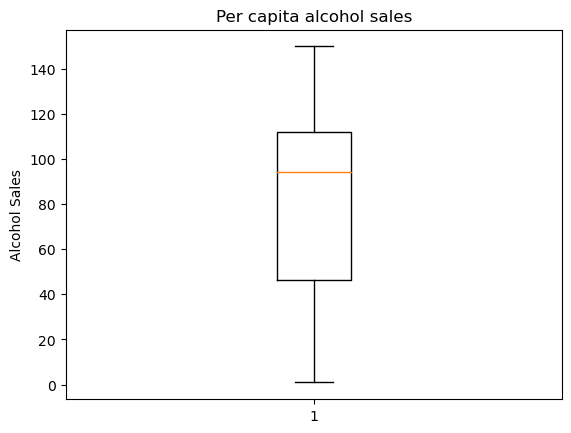

In [21]:
# box and whisker plot showing alcohol sales per capita
per_cap = alcohol_income["Per Capita"]
fig1, ax1 = plt.subplots()
ax1.set_title('Per capita alcohol sales')
ax1.set_ylabel("Alcohol Sales")
ax1.boxplot(per_cap)
plt.show()

In [22]:
# Determine if there are any potential outliers in the per capita alcohol sales in US
quartiles= alcohol_income['Per Capita'].quantile([.25,.5,.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
iqr = upperq-lowerq
iqr1_5 = iqr * 1.5
print(f'The lower quartile of Per capita alcohol sales is: {lowerq}')
print(f'The upper quartile of Per Capita alcohol sales is: {upperq}')
print(f'The interquartile range of Per Capita Alcohol is: {iqr}')
print(f'The median of Per Capita Alcohol sales is: {quartiles[0.5]}')

lower_bound = lowerq - iqr1_5
upper_bound = upperq + iqr1_5
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')


The lower quartile of Per capita alcohol sales is: 46.33621867234351
The upper quartile of Per Capita alcohol sales is: 112.03553832150412
The interquartile range of Per Capita Alcohol is: 65.6993196491606
The median of Per Capita Alcohol sales is: 94.35118010028175
Values below -52.21276080139739 could be outliers.
Values above 210.584517795245 could be outliers.
